<a href="https://colab.research.google.com/github/zzneha/AI_ML/blob/second/img_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


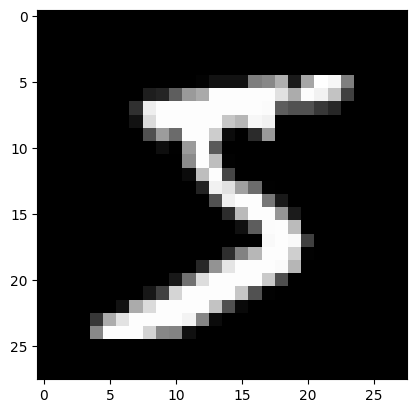

In [4]:
plt.imshow(x_train[0], cmap='gray')

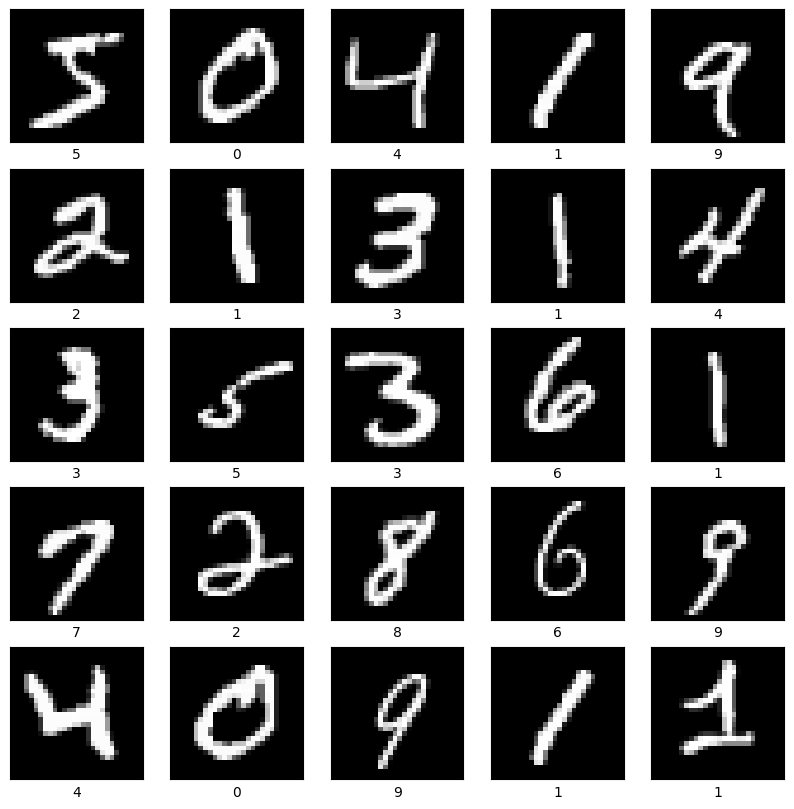

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [6]:
x_train = x_train/255
x_test = x_test/255


In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [21]:

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
import time
start_time = time.time()
model_nmist=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
end_time = time.time()
print("Time taken to train the model: ", end_time - start_time, "seconds")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9058 - loss: 0.3218 - val_accuracy: 0.9792 - val_loss: 0.0623
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9837 - loss: 0.0566 - val_accuracy: 0.9820 - val_loss: 0.0532
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9890 - loss: 0.0368 - val_accuracy: 0.9846 - val_loss: 0.0468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9856 - val_loss: 0.0450
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9874 - val_loss: 0.0441
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9960 - loss: 0.0133 - val_accuracy: 0.9869 - val_loss: 0.0458
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy: 0.9878 - val_loss: 0.0469
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9976 -

In [13]:
test_loss,test_acc = model.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)
print("Test loss: ", test_loss)
print("Test acc: " ,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9836 - loss: 0.0686
Test accuracy:  0.9872999787330627
Test loss:  0.05139696225523949
Test acc:  0.9872999787330627


In [16]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

print("Predicted labels: ", predicted_labels)
print("Actual labels: ", y_test.argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Predicted labels:  [7 2 1 ... 4 5 6]


AxisError: axis 1 is out of bounds for array of dimension 1

In [18]:
from PIL import Image
img = Image.open('/content/0-9-Handwritten-5.png')

In [19]:
img = img.convert('L')
img = img.resize((28,28))
img = np.array(img)
img = img.reshape((1,28,28,))


In [22]:
predictions = model.predict(img)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [24]:
predicted_labels = np.argmax(predictions)
print("Predicted labels: ", predicted_labels)

Predicted labels:  0
